#### Setup

In [2]:
%pip install -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 9.1 MB/s eta 0:00:00:00:010:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


#### Imports

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

2024-07-12 22:16:02.251548: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import os
print(os.getcwd())

/Volumes/T7 Shield APFS/Non School Projects/Kaggle-Challenges/House Prices


In [5]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.16.2
TensorFlow Decision Forests v1.9.0


#### Load Data

In [10]:
train_file_path = r"Data/train.csv"
test_file_path = r"Data/test.csv"
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
data = [train, test]
for df in data:
    print("Full dataset shape is {}".format(df.shape))

Full dataset shape is (1460, 81)
Full dataset shape is (1459, 80)


#### Data Cleaning

In [11]:
train = train.drop('Id', axis=1)


#### Exploration

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/x7/08r503x15pz0twd7l5v9p7yh0000gn/T/ipykernel_10285/2854269269.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


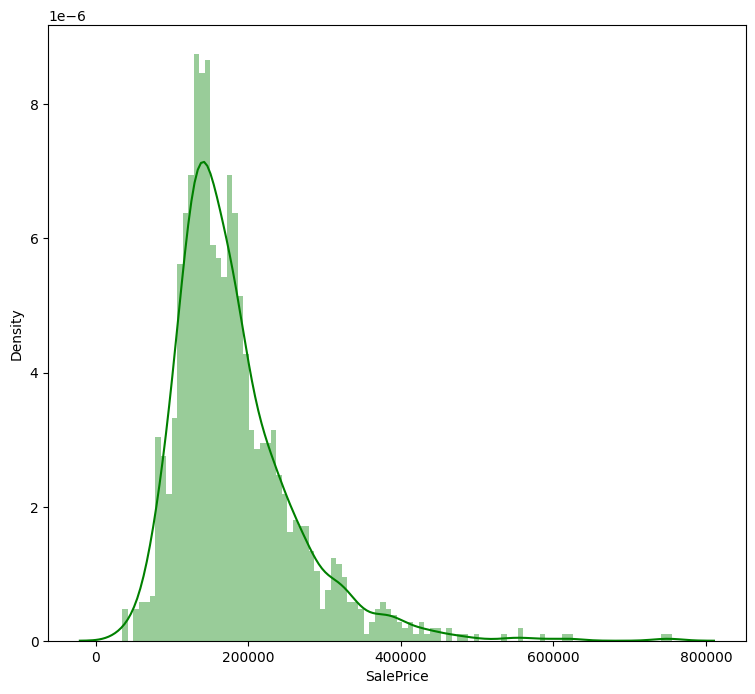

In [15]:
print(train['SalePrice'].describe())
plt.figure(figsize = (9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

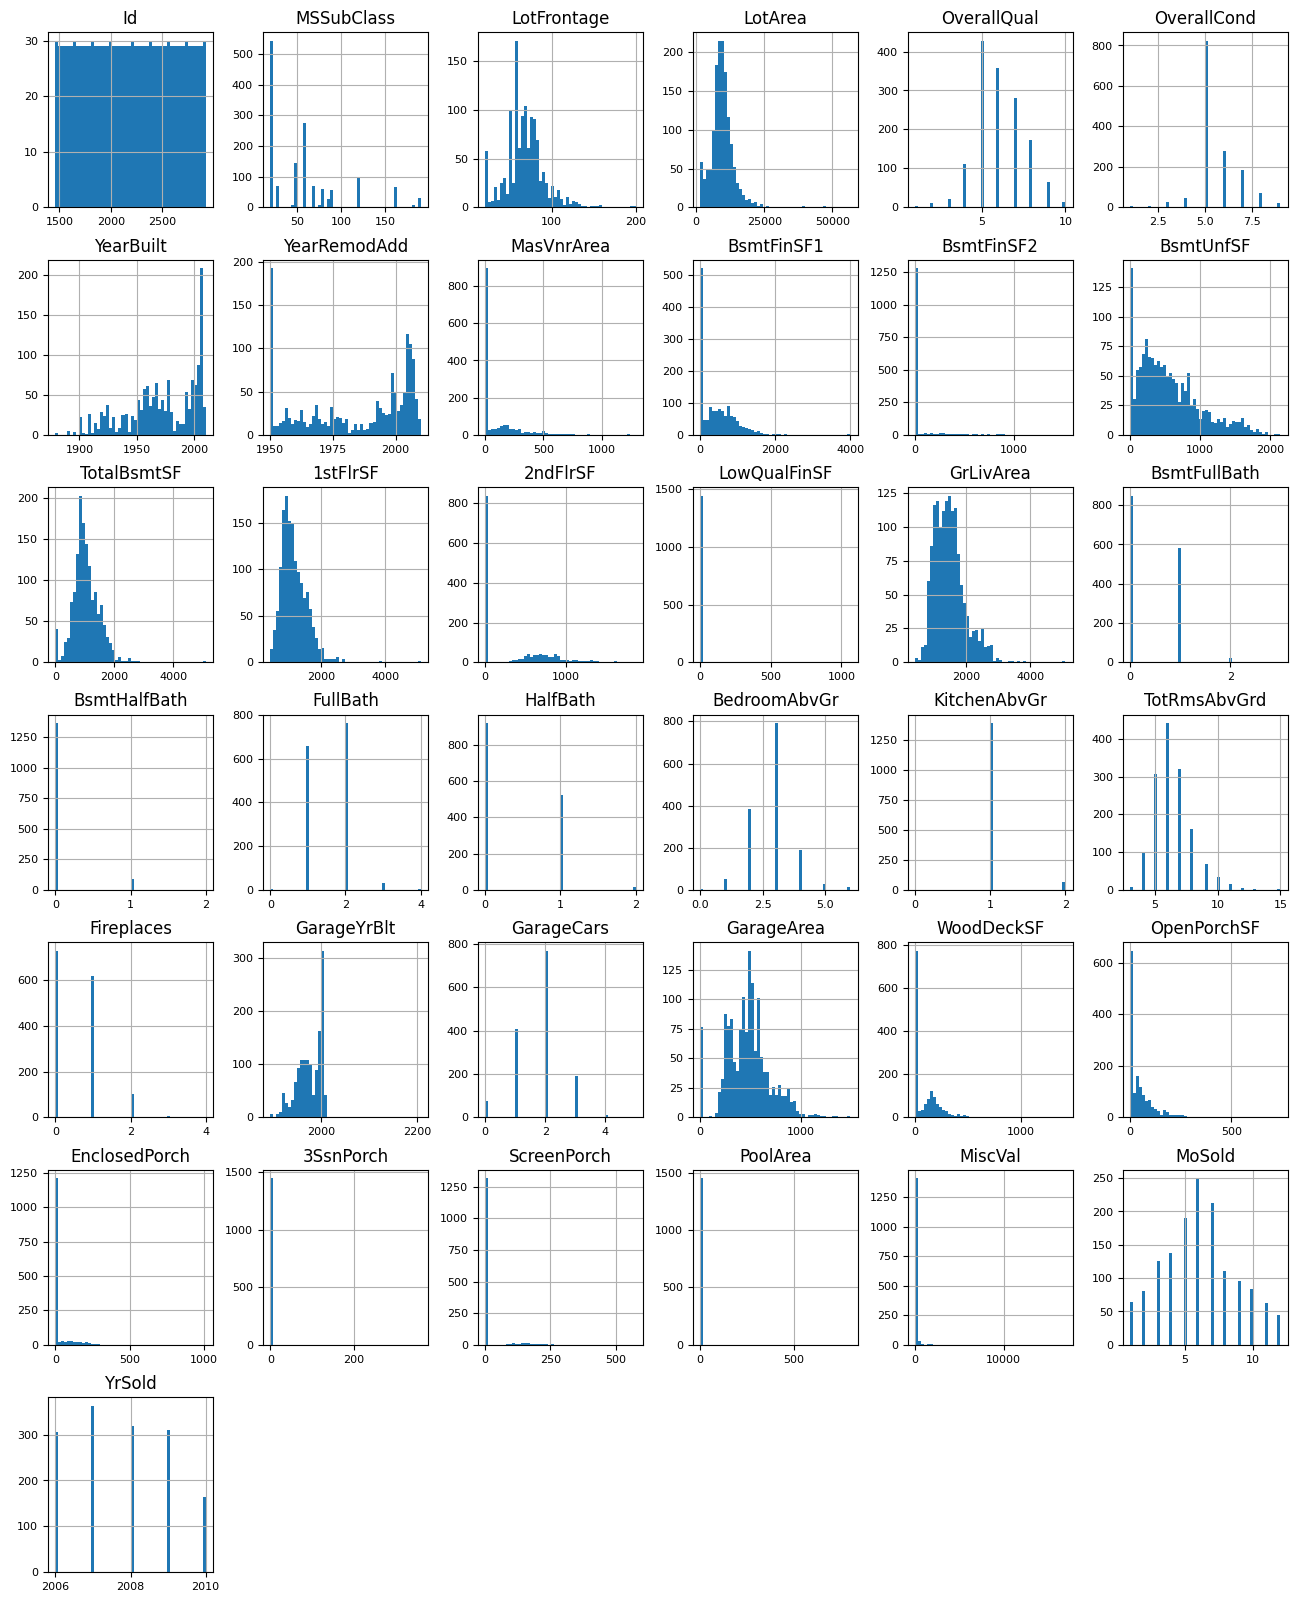

In [16]:
test_num = test.select_dtypes(include = ['float64', 'int64'])
test_num.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8)

#### Modeling

In [ ]:
tfdf.keras.get_all_models()

In [ ]:
model = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"])

model.fit